#### Step 1: Importing necessary libraries

In [1]:
import pandas as pds
from matplotlib import pyplot as plt

#### Step 2: Importing and reading data files via pandas

In [5]:
DemandData = pds.read_csv('Demand Data.csv')
SupplyData = pds.read_csv('Supply Data.csv')

#### Step 3: Introducing and analyzing imported datasets for further work

In [7]:
DemandData.head()

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (%)
0,2016-12-18 23,9,32,78
1,2016-12-18 22,29,64,69
2,2016-12-18 21,5,39,89
3,2016-12-18 20,13,48,79
4,2016-12-18 19,12,77,87


In [8]:
SupplyData.head()

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Hours per active driver,Rides per online hour,Finished Rides
0,2016-12-18 23,52,18,6,11,0.3,0.67,12.0
1,2016-12-18 22,59,20,11,9,0.3,1.40,28.0
2,2016-12-18 21,72,25,7,18,0.3,0.64,16.0
3,2016-12-18 20,86,29,7,23,0.3,0.52,15.0
4,2016-12-18 19,82,31,14,17,0.4,1.16,36.0


In [9]:
DemandData['Date']

0      2016-12-18 23
1      2016-12-18 22
2      2016-12-18 21
3      2016-12-18 20
4      2016-12-18 19
           ...      
834    2016-11-14 04
835    2016-11-14 03
836    2016-11-14 02
837    2016-11-14 01
838    2016-11-14 00
Name: Date, Length: 839, dtype: object

#### Step 4: Changing the types of columns (from object to datetime)

In [11]:
DemandData['Date'] = pds.to_datetime(DemandData['Date'])
DemandData['Date']

0     2016-12-18 23:00:00
1     2016-12-18 22:00:00
2     2016-12-18 21:00:00
3     2016-12-18 20:00:00
4     2016-12-18 19:00:00
              ...        
834   2016-11-14 04:00:00
835   2016-11-14 03:00:00
836   2016-11-14 02:00:00
837   2016-11-14 01:00:00
838   2016-11-14 00:00:00
Name: Date, Length: 839, dtype: datetime64[ns]

In [12]:
DemandData.head()

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (%)
0,2016-12-18 23:00:00,9,32,78
1,2016-12-18 22:00:00,29,64,69
2,2016-12-18 21:00:00,5,39,89
3,2016-12-18 20:00:00,13,48,79
4,2016-12-18 19:00:00,12,77,87


In [13]:
SupplyData['Date'] = pds.to_datetime(SupplyData['Date'])
SupplyData.head()

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Hours per active driver,Rides per online hour,Finished Rides
0,2016-12-18 23:00:00,52,18,6,11,0.3,0.67,12.0
1,2016-12-18 22:00:00,59,20,11,9,0.3,1.40,28.0
2,2016-12-18 21:00:00,72,25,7,18,0.3,0.64,16.0
3,2016-12-18 20:00:00,86,29,7,23,0.3,0.52,15.0
4,2016-12-18 19:00:00,82,31,14,17,0.4,1.16,36.0


#### Step 5: Extracting hours from 'Date' column for further analytics

In [17]:
DemandData['DateHour'] = DemandData['Date'].dt.hour
DemandData.head()

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (%),DateHour
0,2016-12-18 23:00:00,9,32,78,23
1,2016-12-18 22:00:00,29,64,69,22
2,2016-12-18 21:00:00,5,39,89,21
3,2016-12-18 20:00:00,13,48,79,20
4,2016-12-18 19:00:00,12,77,87,19


In [18]:
SupplyData['DateHour'] = SupplyData['Date'].dt.hour
SupplyData.head()

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Hours per active driver,Rides per online hour,Finished Rides,DateHour
0,2016-12-18 23:00:00,52,18,6,11,0.3,0.67,12.0,23
1,2016-12-18 22:00:00,59,20,11,9,0.3,1.40,28.0,22
2,2016-12-18 21:00:00,72,25,7,18,0.3,0.64,16.0,21
3,2016-12-18 20:00:00,86,29,7,23,0.3,0.52,15.0,20
4,2016-12-18 19:00:00,82,31,14,17,0.4,1.16,36.0,19


#### Step 6: Calculating average Coverage ratio and Online hours for analyzing Demand and Supply trends

In [22]:
DemandAVG = DemandData.groupby('DateHour').mean()

In [23]:
DemandAVG.head()

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (%)
DateHour,,,,
0,2016-12-01 00:00:00,8.714286,45.342857,84.942857
1,2016-12-01 01:00:00,7.542857,30.228571,80.400000
2,2016-12-01 02:00:00,8.257143,22.085714,76.171429
3,2016-12-01 03:00:00,12.228571,18.400000,63.628571
4,2016-12-01 04:00:00,13.028571,12.800000,53.428571


In [26]:
SupplyAVG = SupplyData.groupby('DateHour').mean()

In [28]:
SupplyAVG.head()

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Hours per active driver,Rides per online hour,Finished Rides
DateHour,,,,,,,,
0,2016-12-01 00:00:00,61.171429,24.657143,7.714286,16.971429,0.402857,0.764286,19.685714
1,2016-12-01 01:00:00,51.514286,20.428571,5.200000,15.257143,0.388571,0.550571,13.264706
2,2016-12-01 02:00:00,39.714286,15.857143,3.685714,12.200000,0.388571,0.518857,10.125000
3,2016-12-01 03:00:00,31.942857,12.742857,3.114286,9.514286,0.388571,0.492857,10.035714
4,2016-12-01 04:00:00,27.371429,10.314286,2.657143,7.657143,0.368571,0.468000,10.000000


#### Step 7: Making average coverage barchart by hours for identifying which period of time had most efficient usage

<BarContainer object of 24 artists>

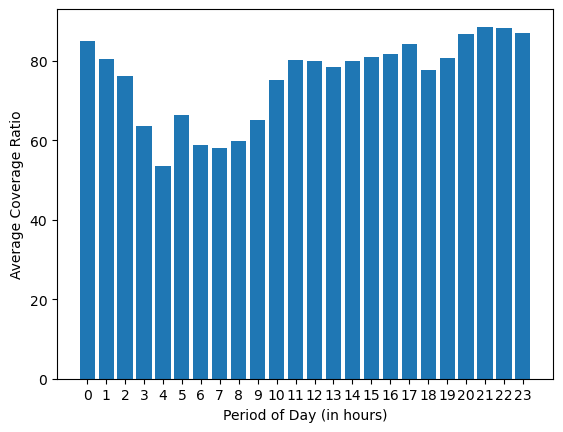

In [36]:
hrs = range(0,24)
DemandBar = plt.bar(hrs,DemandAVG['Coverage Ratio (%)'])
plt.xticks(hrs)
plt.xlabel('Period of Day (in hours)')
plt.ylabel('Average Coverage Ratio')
DemandBar

#### Step 8: Making average online hours supply barchart for identifying which period of time drivers were more busy

<BarContainer object of 24 artists>

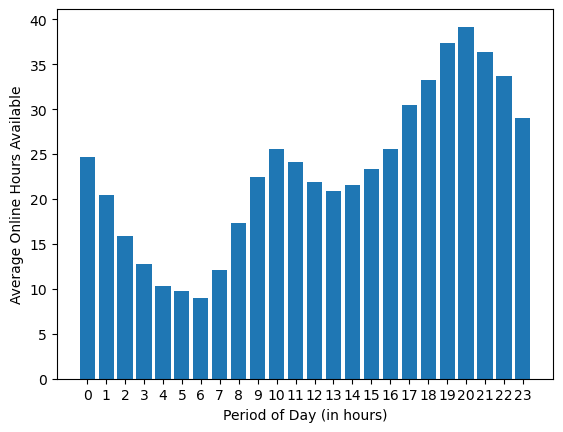

In [35]:
SupplyBar = plt.bar(hrs,SupplyAVG['Online (h)'])
plt.xticks(hrs)
plt.xlabel('Period of Day (in hours)')
plt.ylabel('Average Online Hours Available')
SupplyBar

#### Results: As diagrams have shown, more efficient and more busy time frames were on morning hours, between 8 am and 12 pm, and evening hours, between 17 pm and 1 am.
#### The reason is that in morning people go to the jobs and in the evening they come back, and therefore has more demand on taxi drivers.

#### Step 9: Calculating minimum required online hours to have good coverage ratio

In [39]:
SupplyData.describe()['Online (h)']

count    840.000000
mean      23.197619
min        2.000000
25%       14.000000
50%       23.000000
75%       31.000000
max       56.000000
std       11.101503
Name: Online (h), dtype: float64

#### Conclusion: It's necessary to provide more than 23 online hours to have good coverage ratio 